## 决策边界

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [2]:
iris = datasets.load_iris()

In [3]:
X = iris.data
y = iris.target

In [4]:
X = X[y<2,:2]
y = y[y<2]

In [5]:
X.shape

(100, 2)

In [6]:
y.shape

(100,)

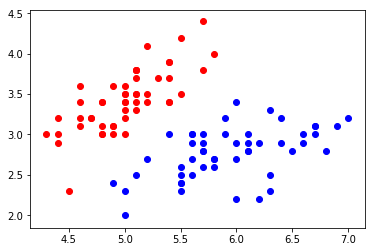

In [8]:
plt.scatter(X[y==0,0],X[y==0,1],color='r')
plt.scatter(X[y==1,0],X[y==1,1],color='b')
plt.show()

## 决策边界函数

In [9]:
from ClassicIMPL.logistic_regression.LogisticRegression import LogisticRegression
log_reg = LogisticRegression()

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [12]:
log_reg.fit(X_train,y_train)

LogisticRegression()

In [15]:
def x2(x1):
    return (-log_reg.coef_[0] * x1 - log_reg.intercept_) / log_reg.coef_[1]

In [16]:
x1_plot = np.linspace(4, 8, 1000)
x2_plot = x2(x1_plot)

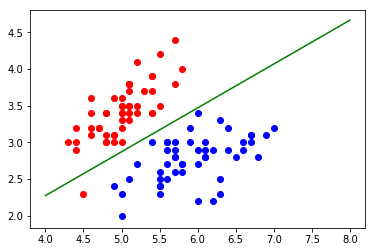

In [18]:
plt.scatter(X[y==0,0],X[y==0,1],color='r')
plt.scatter(X[y==1,0],X[y==1,1],color='b')
plt.plot(x1_plot,x2_plot,color='g')
plt.show()

In [23]:
axis = [2,5,0,6]
x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )

In [24]:
print(x0.shape)
print(x1.shape)

(600, 300)
(600, 300)


In [25]:
X_new = np.c_[x0.ravel(), x1.ravel()]

In [26]:
X_new

array([[2.        , 0.        ],
       [2.01003344, 0.        ],
       [2.02006689, 0.        ],
       ...,
       [4.97993311, 6.        ],
       [4.98996656, 6.        ],
       [5.        , 6.        ]])

In [27]:
X_new.shape

(180000, 2)

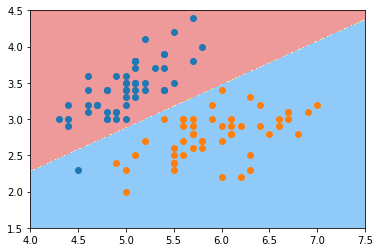

In [29]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)
    
plot_decision_boundary(log_reg, axis=[4, 7.5, 1.5, 4.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

### kNN的决策边界

/A/develop/ide/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


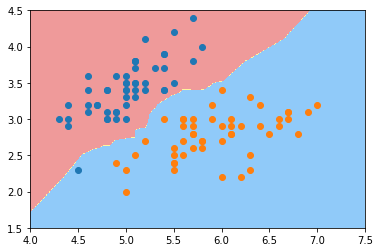

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train,y_train)
plot_decision_boundary(knn_clf,axis=[4, 7.5, 1.5, 4.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [33]:
X.shape

(100, 2)

In [35]:
iris.data.shape

(150, 4)

In [36]:
iris.data[:,:2].shape


(150, 2)

In [37]:
knn_clf_all = KNeighborsClassifier()
knn_clf_all.fit(iris.data[:,:2],iris.target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

/A/develop/ide/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


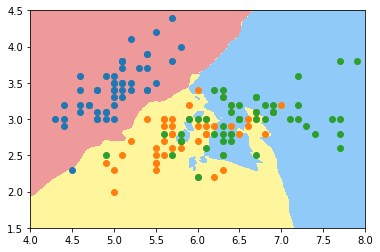

In [38]:
plot_decision_boundary(knn_clf_all, axis=[4, 8, 1.5, 4.5])
plt.scatter(iris.data[iris.target==0,0], iris.data[iris.target==0,1])
plt.scatter(iris.data[iris.target==1,0], iris.data[iris.target==1,1])
plt.scatter(iris.data[iris.target==2,0], iris.data[iris.target==2,1])
plt.show()

/A/develop/ide/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


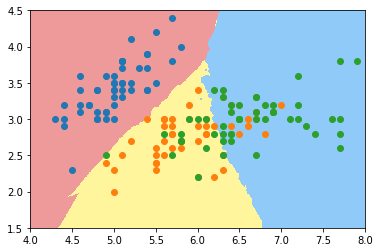

In [39]:
knn_clf_all = KNeighborsClassifier(n_neighbors=50)
knn_clf_all.fit(iris.data[:,:2], iris.target)

plot_decision_boundary(knn_clf_all, axis=[4, 8, 1.5, 4.5])
plt.scatter(iris.data[iris.target==0,0], iris.data[iris.target==0,1])
plt.scatter(iris.data[iris.target==1,0], iris.data[iris.target==1,1])
plt.scatter(iris.data[iris.target==2,0], iris.data[iris.target==2,1])
plt.show()